<img align="right" style="max-width: 200px; height: auto" src="https://github.com/HSG-AIML-Teaching/MLBBWL-2023FS/blob/main/lab_01/hsg_logo.png?raw=1">

#  Lab 1 - "Supervised Learning with Scikit-Learn"

Machine Learning (BBWL), University of St. Gallen, Spring Term 2023, Michael Mommert

Today, we will use your Python skills implement our first machine learning models. For this purpose, we will utilize the [`scikit-learn`](https://scikit-learn.org/stable/index.html) package, which provides a huge amount of functionality for different machine learning tasks, as well as some datasets for learning how to use this functionality. 

In this example, we will utilize a *k*NN multi-class classfication model.

## Lab Objectives:

The learning objectives for today are based on the supervised learning setup discussed in our lecture:

<img align="left" style="max-width: 1000px; height: auto" src="https://github.com/HSG-AIML-Teaching/MLBBWL-2023FS/blob/main/lab_01/sl_setup.png?raw=1">

This Notebook follows this pipeline in its structure:

> 0. Load data
> 1. Feature engineering
> 2. Data scaling
> 3. Data splitting
> 4. Define hyperparameters
> 5. Train model on fixed hyperparameters
> 6. Evaluate model on val data set
> 7. Maximize performance on validation data set by tuning hyperparameters
> 8. Evaluate trained model on test data 

We will apply these steps to the $k$NN classifier. Furthermore, we will look at the following things in this lab:
> 9. Model evaluation with the confusion matrix
> 10. Setting up a random forest classifier

## -1. Setup of the Environment

Before we do anything, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Numpy`, `scikit-learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [1]:
# import the numpy, scipy and pandas data science library
import numpy as np

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

Enable inline Jupyter notebook plotting:

In [2]:
%matplotlib inline

Use the 'Seaborn' plotting style in all subsequent visualizations:

In [3]:
plt.style.use('seaborn')

Set random seed of all our experiments - this insures reproducibility.

In [4]:
random_seed = 42

# 0. Load data

In this lab we will utilize the **Iris Dataset**, a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour and the Iris Virginica, and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="https://github.com/HSG-AIML-Teaching/MLBBWL-2023FS/blob/main/lab_01/iris_dataset.png?raw=1">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

## 0.1 Dataset Download and Data Exploration

In [5]:
iris = datasets.load_iris()

How is the dataset structured?

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's have a look at the dataset description:

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Print and inspect the names of the four features contained in the dataset:

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Determine and print the feature dimensionality of the dataset:

In [9]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [10]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="https://github.com/HSG-AIML-Teaching/MLBBWL-2023FS/blob/main/lab_01/feature_collection.png?raw=1">

Let's inspect the top five feature rows of the Iris Dataset:

In [12]:
iris.data[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Let's also inspect the top five class labels of the Iris Dataset:

In [13]:
iris.target[:5]

array([0, 0, 0, 0, 0])

## 0.2 Dataset Exploration

Let's now conduct a more in depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Pls. note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualization library based on the Matplotlib. It provides a great interface for drawing informative statstical graphics (https://seaborn.pydata.org). 

<Figure size 1000x1000 with 0 Axes>

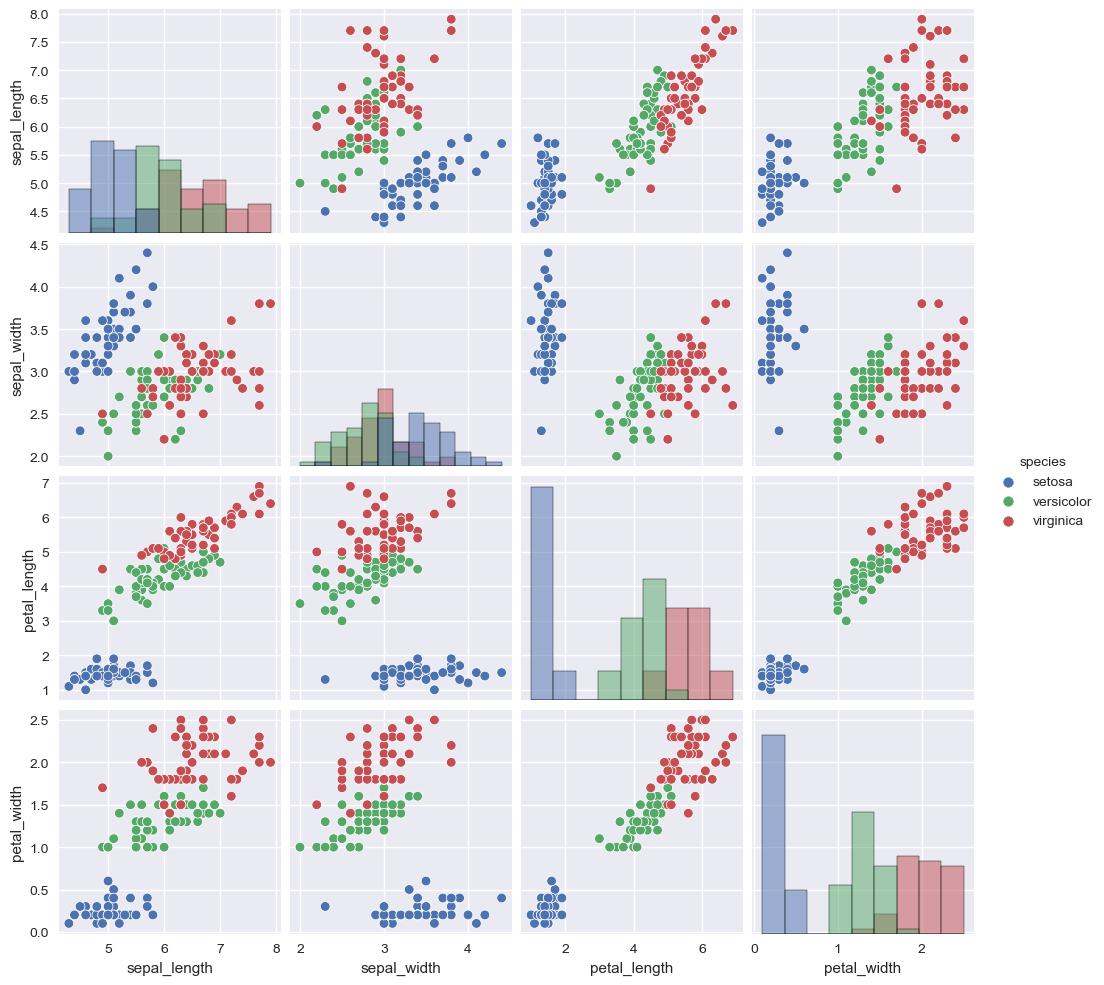

In [14]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear separability** from the feature measurements of the remaining flower classes. In addition, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear separability** across all the measured feature distributions of the Iris Dataset.

# 1. Feature Engineering

Both the **input** data (`iris.data`) and the **output** data (`iris.target`) are already available in the form of quantitative data (continuous input data and discrete class labels), which we directly feed into our ML models. Therefore, no feature engineering is required for this specific data set.

# 2. Data scaling

As you can see in the plot above, the diffferent features span different ranges: *sepal_length* ranges from 4 to 8, *sepal_width* from 2 to 4 and so on. Those different ranges might affect the learning process negatively.

In the case of $k$-Nearest Neighbor classification as we implement it below, the nearest neighbors are identified based on a distance measure. If the features are differently scaled, they are not considered equally important by the model. Consider the following example: the max-min distance in *sepal_length* is 4, whereas the same for *sepal_width* is only 2. When calculating the Euclidean distance between two datapoints, the contribution to the distance from *sepal_length* is likely to be larger than that from *sepal_width*. As a result, *sepal_length* has much more power and turns out to be more decisive in the resulting distance measure and classification results.

To avoid this problem, one typically scales or normalizes the data in a uniform way. One way would be to scale the values in each feature relative to their maximum and minimum values, called the **min-max-scaler**:
$$\mathbf{x'} = \frac{\mathbf{x}-min(\mathbf{x})}{max(\mathbf{x})-min(\mathbf{x})}$$


Since the minimum and maximum values might be affected by outliers, a safer way would be to scale the data and the mean and standard deviation of the sample, which is sometimes called a **standard scaler**:
$$\mathbf{x'} = \frac{\mathbf{x}-mean(\mathbf{x})}{\sigma(\mathbf{x})}$$

The standard scaler forces upon the values in each feature a mean of unity and a spread that is based on the variance in the dataset. 


Let's use the standard scaler implemented in scikit-learn to scale our data. We have to import the correponding class and initialize it.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

To apply the scaler and retrieve a transformed dataset, we can use the `.fit_transform()` method (the name might sound weird here, but will make sense later):

In [16]:
data_scaled = scaler.fit_transform(iris.data)

In [17]:
print('original data, mean =', np.mean(iris.data, axis=0))
print('original data, std =', np.std(iris.data, axis=0))
print('scaled data, mean =', np.mean(data_scaled, axis=0))
print('scaled data, std =', np.std(data_scaled, axis=0))

original data, mean = [5.84333333 3.05733333 3.758      1.19933333]
original data, std = [0.82530129 0.43441097 1.75940407 0.75969263]
scaled data, mean = [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
scaled data, std = [1. 1. 1. 1.]


We can now use the scaled data in our machine learning model. 

Hint: If you would like to undo the scaling tranformation, you can use the `.inverse_transform()` method of `scaler`:

In [18]:
print('original data:', iris.data[0,])
print('scaled data:', data_scaled[0,])
print('unscaled data:', scaler.inverse_transform(data_scaled[0,].reshape(1, -1)))

original data: [5.1 3.5 1.4 0.2]
scaled data: [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
unscaled data: [[5.1 3.5 1.4 0.2]]


# 3. Data splitting

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice to divide the dataset into a **training dataset** (the fraction of data records solely used for training purposes), a **validation dataset** (data to evaluate the current settings of your hyperparameters) and a **test dataset** (the fraction of data records solely used for independent evaluation purposes). Please note that both the **validation dataset** and the **test dataset** will never be shown to the model as part of the training process. The **test dataset** is sometimes also referred to as **evaluation set**; both terms refer to the same concept.

We first split our scaled dataset into a training dataset and some other dataset (which we will refer to as *remainder* in the following) that will then be evenly split into a validation and test dataset. We set the fraction of training records to **60%** of the original dataset:

In [19]:
train_fraction = 0.6

Randomly split the scaled dataset into training set and evaluation set using sklearn's `train_test_split` function:

In [20]:
# 60% training and 40% remainder
x_train, x_remainder, y_train, y_remainder = train_test_split(data_scaled, iris.target, test_size=1-train_fraction, 
                                                              random_state=random_seed, stratify=iris.target)

In [21]:
# 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, 
                                                random_state=random_seed, stratify=y_remainder)

Note the use of the `stratify` keyword argument here: a stratified split makes sure that approximately the same fraction of samples from each class is present in each dataset. Therefore, we have to provide the same list of class labels to this argument.

Evaluate the different dataset dimensionalities:

In [22]:
print('original:', iris.data.shape, iris.target.shape)
print('train:', x_train.shape, y_train.shape)
print('val:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

original: (150, 4) (150,)
train: (90, 4) (90,)
val: (30, 4) (30,)
test: (30, 4) (30,)


# 4. Define Hyperparameters

As we learned in the lecture, our *k*NN model has a single hyperparameter: the number of neighbors, *k*. We start by considering a simple *nearest neighbor* model, which, of course, implies that $k=1$.

 

In [23]:
k = 1

# 5. Train model on fixed hyperparameters

As we already mentioned, we will utilize the `scikit-learn` package, which contains implementations of many different ML methods and tasks, including a [*k*NN classifier](https://scikit-learn.org/stable/modules/neighbors.html). 
Using `scikit-learn` is simple and its API is consistent throughout many different tasks and applications. 

We start by creating a model instance, which requires passing the chosen hyperparameters to the model: 

## 2.1 $k$-Nearest Neighbor Classification

The idea is simple: we assign to each unseen datapoint the same class that its $k$ nearest neighbors have. This method is intuitive and straightforward. It requires the definition of hyperparameter $k$ and the definition of a distance metric. Let's have a look at he `scikit-learn` implementation:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Before we can use the method, we have to instantiate it by assigning the appropriate hyperparameters, $k$:

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=k)

Now we have to train the model on our training dataset. Each model implemented in `scikit-learn` has a `.fit()` method for this purpose. "Fitting" refers here to the same idea that we typically refer to as "training", so don't get confused.

The training of the data requires two `arrays`: the training input features ($\mathbf{X}$) and the training target vector ($\mathbf{y}$), such that for a given classifier $f$ the following holds: 
$$f(\mathbf{X}) = \mathbf{y}$$

The way we split our dataset and into `x_train` and `y_train` already follows this naming convention. We can use those `arrays` readily in the training. Just for reference: `x_train` has to be of shape `(n_samples, n_features)` and `y_train` has to be of shape `(n_samples,)`.

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

`model` is now trained and can be used to make predictions. Let's take one datapoint from our training dataset and see whether it makes a correct prediction:

In [27]:
model.predict([x_train[0]])

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2])

In [28]:
y_train[0]

2

Indeed, it classifies this single datapoint correctly. However, this is not a good way to test or evaluate the performance of your model. Why?

# 6. Evaluate model on val data set

Of course, we should use our previously split test sample for evaluating our model performance:

In [29]:
y_pred = model.predict(x_val)
y_pred

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 1])

In [30]:
y_val

array([2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 1])

A quick by-eye check seems to look pretty promising, but of course we need a more quantitative metric for the performance of our model.

In the case of classification, we can use the accuracy metric:

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_val)

0.9666666666666667

This is it. After evaluation on our independent eval dataset - which the model has not seen during training - we find that our model makes an accurate prediction in 96.7% of cases.

This could be it, but there is a good chance that by tuning our sole hyperparameter, $k$, we can achieve a better result. 

## 7. Maximize performance on validation data set by tuning hyperparameters

Let's compile all the relevant code in one cell and try a different value for $k$:

In [32]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
accuracy_score(y_pred, y_val)

c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

We can now use a loop over different choices for $k$ and evaluate the model for these parameters to find the best-performing one. This process is called **hyperparameter tuning**.

However, there is one more technical detail. Currently, we evaluate the performance on our **test dataset**. If we select $k$ based on these evaluations and therefore the **test dataset**, we have a *data leakage*. To resolve that issue, we can evaluate our model on the **validation dataset** for different $k$s and then, after picking the best-performing $k$, we can evaluate that model on the **test dataset**, providing an independent measure of performance. 

In [33]:
for k in [1, 3, 5, 7, 10, 15, 20]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    print('k={:d}, val accuracy={:.2f}%'.format(k, accuracy_score(y_pred, y_val)*100))

k=1, val accuracy=96.67%
k=3, val accuracy=96.67%
k=5, val accuracy=93.33%
k=7, val accuracy=93.33%
k=10, val accuracy=96.67%
k=15, val accuracy=96.67%
k=20, val accuracy=90.00%


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

It seems that the model performs equally well for $k\sim\{1, 3\}$ and $k\sim\{10, 15\}$. Based on experience, I would pick $k=10$. Why? For small values 
of $k$, you are more likely to **overfit** the training data, so choosing a larger value of $k$ increases the chances that the model generalizes well to data it has never seen before.


# 8. Evaluate trained model on test data set

Let's retrain the model with $k=10$, make predictions on the test data set and we're done:

In [34]:
k = 10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('final test accuracy={:.2f}%'.format(accuracy_score(y_pred, y_test)*100))

final test accuracy=96.67%


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Indeed, evaluating the model on the test dataset provides the same accuracy as for the validation dataset - but this is not always the case, since both datsets are different from one another.

# 9. Model evaluation with the confusion matrix

So far, we have only considered the accuracy metric to evaluate our predictions. It would be useful to know whether one class of iris is more likely to be mistaken than another. For that purpose, confusion matrizes are used:

In [35]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
mat

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

On the y-axis you have your predicted classes, on the x-axis you have the actual classes. Those entries on the diagonal have been accurately predicted. Entries off the diagonal indicate how many flowers have incorrect class predictions.

The ``seaborn`` library provides a method to generate nicely formatted confusion matrizes. Let's give it a try:

Text(0.5, 1.0, 'Confusion Matrix')

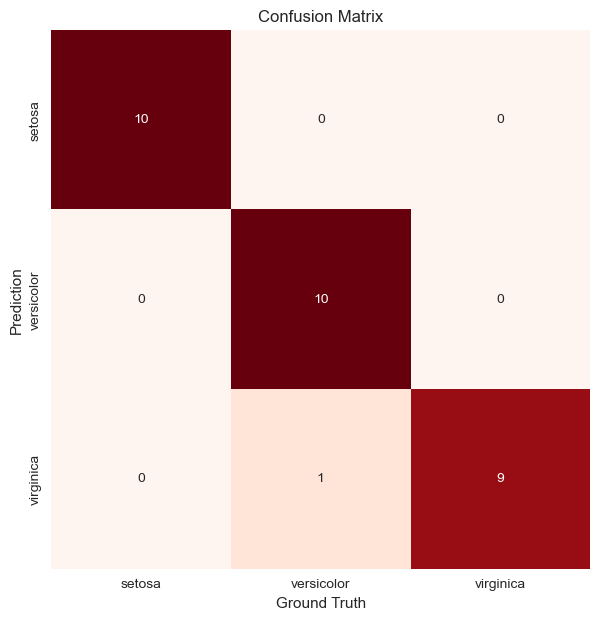

In [36]:
# init the plot
plt.figure(figsize=(7, 7))

# plot confusion matrix heatmap
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Reds', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')

# add plot title
plt.title('Confusion Matrix')

# 10. Setting up a random forest classifier

We found that a $k$-Nearest Neighbor classifier performs rather well on the Iris dataset. But what if we would like to try a different ML method?

With `scikit-learn`, this is very easy to do. Since all algorithms (ML methods, scalers, etc.) are implemented as classes and thus provide `.fit()` and `.transform()` methods, we can simply replace them!
Let's choose a **random forest** classifier. Here, we use two different hyperparameters: the number of trees in the ensemble and the maximum depth of the individual trees:

In [37]:
from sklearn.ensemble import RandomForestClassifier

for n in [10, 50, 100, 200, 500]:
    for d in [3, 7, 12]:
        model = RandomForestClassifier(n_estimators=n, max_depth=d)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_val)
        print('n={:3d}, d={:2d}, val accuracy={:.2f}%'.format(n, d, accuracy_score(y_pred, y_val)*100))

n= 10, d= 3, val accuracy=93.33%
n= 10, d= 7, val accuracy=93.33%
n= 10, d=12, val accuracy=93.33%
n= 50, d= 3, val accuracy=93.33%
n= 50, d= 7, val accuracy=93.33%
n= 50, d=12, val accuracy=93.33%
n=100, d= 3, val accuracy=93.33%
n=100, d= 7, val accuracy=93.33%
n=100, d=12, val accuracy=93.33%
n=200, d= 3, val accuracy=93.33%
n=200, d= 7, val accuracy=93.33%
n=200, d=12, val accuracy=93.33%
n=500, d= 3, val accuracy=93.33%
n=500, d= 7, val accuracy=93.33%
n=500, d=12, val accuracy=93.33%


The results are very comparable, but the point is simply that with `scikit-learn`, you can pick any of the implemented methods and easily implement and try them in your code!